#  DSC530-T304 Data Exploration and Analysis - Week 5 #

## Modeling Distributions and Probability Density Functions ##

### Excercise Chapter 5 ###
-----

In [1]:
# Download pregency and respondent data files from thinkstat

from os.path import basename, exists

# Declare a function to download the files to local
def download(fileurl):
    filename = basename(fileurl)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(fileurl, filename)
        print("Downloaded " + local)

In [2]:
# Dowload the python and data files to load pregnency and respondent data 
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")

**Excercise 5-1**
 In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.
In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

In [4]:
# download the python file read the bio metric data
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")


In [5]:
# download the  bio metric data file
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

In [6]:
# import the python script to read the bio metric data
import brfss 

In [7]:
# Read the bio metic data
wt_df = brfss.ReadBrfss()

In [8]:
# print the top 5 records
wt_df.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0


In [9]:
#  drop any records that has no values 
heights = wt_df.htm3.dropna()

In [10]:
heights.describe()

count    409129.000000
mean        168.825190
std          10.352653
min          61.000000
25%         160.000000
50%         168.000000
75%         175.000000
max         236.000000
Name: htm3, dtype: float64

In [11]:
from scipy.stats import norm

# declare values provided using variables
mean_value = 178
std_dev_value = 7.7
start_range = 177.8  #  converting 5ft 10 in to cm as mean value and std deviation is in cm units
end_range = 185.42   #  converting 6ft 1in to cm

#Ieration 1 -  using distrubtion cdf values find the percentage of heights wthin 5' 10" and 6' 1"

#Re-create the distribution using mean and std
distributn = norm(loc=mean_value, scale=std_dev_value)

#retrieve the cumulative distribution of start value
cdf_start = distributn.cdf( start_range )

#retrieve the cumulative distribution of start value
cdf_end = distributn.cdf( end_range )

# Find the difference of cdf to retrieve the net percentage
percentage_within = (cdf_end - cdf_start) * 100

print(f"Iteration 1 : The percentage of values within the range [{start_range}, {end_range}] is: {percentage_within:.2f}%")

#Ieration 2 -  using distrubtion cdf z score values find the percentage of heights wthin 5' 10" and 6' 1"
# use z_scores - measure of how many standard deviations a particular data point is from the mean
z_start = (start_range - mean_value) / std_dev_value
z_end = (end_range - mean_value) / std_dev_value

# Use the CDF to find the percentage within the range
percentage_within = norm.cdf(z_end) - norm.cdf(z_start)

#retrieve the cumulative distribution of start value
cdf_start = norm.cdf(z_start)

#retrieve the cumulative distribution of start value
cdf_end = norm.cdf(z_end)

# Find the difference of cdf to retrieve the net percentage
percentage_within = ( cdf_end - cdf_start ) * 100


#percentage_within = percentage_within_range(mean_value, std_dev_value, start_range, end_range)
print(f"Iteration 2 : The percentage of values within the range [{start_range}, {end_range}] is: {percentage_within:.2f}%")

Iteration 1 : The percentage of values within the range [177.8, 185.42] is: 34.27%
Iteration 2 : The percentage of values within the range [177.8, 185.42] is: 34.27%


In [12]:
len(heights)

409129

**Exercise 5-2**   To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.
Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

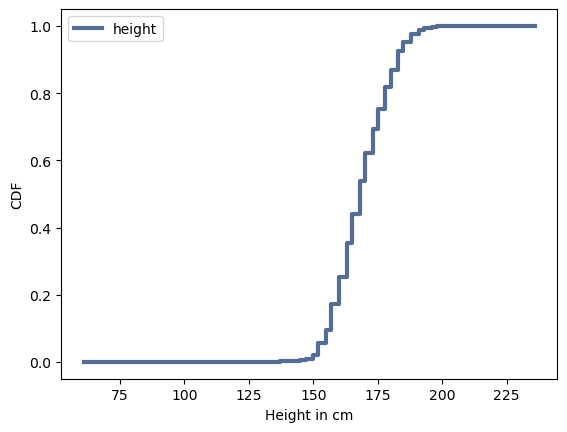

In [13]:
# import the script to laod data
import thinkstats2
import thinkplot
cdf = thinkstats2.Cdf(heights, label="height")

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Height in cm", ylabel="CDF")

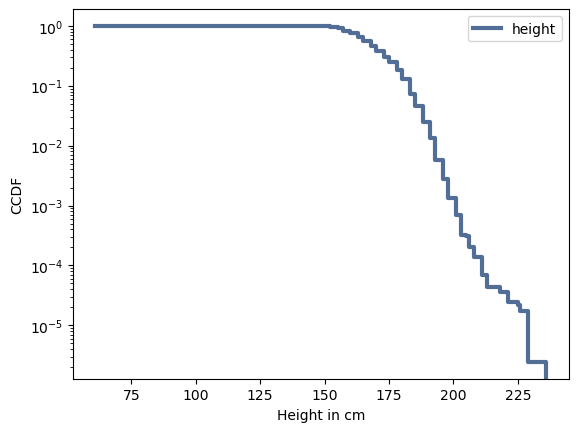

In [14]:
# Log 10 plot 
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(
    xlabel="Height in cm",
    ylabel="CCDF",
    yscale="log",
    loc="upper right",
)

In [15]:
# declare variables to hold given parameters xm = 1 m and α = 1.7, 
pareto_min_val = 1
pareto_alpha = 1.7


In [16]:
from scipy.stats import pareto
# create a distribution usingthe min val and alpha
distribution = pareto(b=pareto_alpha, scale=pareto_min_val)
# From the ditribution find the mean value
print('Iteration 1 mean human height is ', distribution.mean())

Iteration 1 mean human height is  2.428571428571429


In [17]:
# Calculate mean value using min value and alpha
mean_val = ( pareto_alpha * pareto_min_val ) / ( pareto_alpha - 1)
print('Iteration 2 mean human height is ', mean_val) 

Iteration 2 mean human height is  2.428571428571429


In [18]:
#  Fraction of people are shorter than the mean
# find the difference between pareto CDF at mean and pareto CDF at 0 location
print('Fraction of people are shorter than the mean is', distribution.cdf(distribution.mean())  - distribution.cdf(0))

Fraction of people are shorter than the mean is 0.778739697565288


In [19]:
# Generate 100 observed values from the Pareto distribution
#observed_values = pareto.rvs(pareto_alpha, loc=0, scale=pareto_min_val, size=len(heights), random_state=42)
pareto.ppf(1 - 1/1000, pareto_alpha, loc=0, scale=pareto_min_val)

58.17091329374356

In [20]:
# Fraction of people above the 1000m (1km) if the population is 7Billion
# Calculate the fraction difference between max CDF and 1KM CDF and multiply by 7 Billion
# max CDF value is 1
print("Number of people out of 7 Billion that are taller than 1KM : ", (1- distribution.cdf(1000))*7e9)

Number of people out of 7 Billion that are taller than 1KM :  55602.976430479954


In [21]:
# How tall do we expect the tallest person to be?
# The tallest person or height will have CDF value of 1
print("CDF value for 1000000000m or    " , distribution.cdf(1000000000))
print("CDF value for 10000000000m  " , distribution.cdf(10000000000))

CDF value for 1000000000m or     0.9999999999999994
CDF value for 10000000000m   1.0


In [22]:
#The tallest person or height  10,000,000,000m or 10million KM height

**Exercise 6-1**
The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.

The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded hinc06.xls, which is an Excel spreadsheet with information about household income, and converted it to hinc06.csv, a CSV file you will find in the repository for this book. You will also find hinc2.py, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under $5000.” The highest range includes respondents who made “$250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. hinc2.py provides InterpolateSample, which shows one way to model this data. It takes a DataFrame with a column, income, that contains the upper bound of each range, and freq, which contains the number of respondents in each frame.

It also takes log_upper, which is an assumed upper bound on the highest range, expressed in log10 dollars. The default value, log_upper=6.0 represents the assumption that the largest income among the respondents is 106, or one million dollars.

InterpolateSample generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a log10 scale.

Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households reports a taxable income below the mean? How do the results depend on the assumed upper bound?

In [23]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc2.py")

In [24]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")

In [25]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")

In [26]:
# import the script to read the distribution of income data
import hinc
income_df = hinc.ReadData()

In [27]:
income_df.head()

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


In [28]:
income_df.describe()

,income,freq,cumsum,ps
count,42.0,42.000000,42.000000,42.000000
mean,inf,2915.666667,85451.547619,0.697803
std,NaN,2160.505402,34096.220084,0.278432
min,4999.0,364.000000,4204.000000,0.034330
25%,56249.0,1124.250000,66096.000000,0.539744
50%,107499.0,2577.500000,99158.000000,0.809731
75%,158749.0,4331.000000,112628.750000,0.919734
max,inf,7157.000000,122458.000000,1.000000


In [29]:
import numpy as np 
# assign upper bound imcome for each range
income_df['max_incm'] = income_df.income
    
# get the lower bounds by shifting the upper bound and filling in
# the first element
income_df['min_incm'] = income_df.max_incm.shift(1)

# Assign a lower income 
income_df.loc[0, 'min_incm'] = 2000.00

# plug in a value for the unknown upper bound of the highest range
income_df.loc[41, 'max_incm'] = 1000000.0

# use the freq column to generate the right number of values in
# each range
arrays = []
for _, row in income_df.iterrows():
    #print(row)
    vals = np.linspace(row.min_incm, row.max_incm, int(row.freq))
    #print(vals)
    arrays.append(vals)



intpolated_incm  = np.concatenate(arrays)

In [30]:
# Mean through avergae function
sum(intpolated_incm) /  len(intpolated_incm)

76387.6602549444

In [31]:
incm_mean =  intpolated_incm.mean()
print('Mean of the income : ', incm_mean)

Mean of the income :  76387.66025494455


In [32]:
incm_median = np.median(intpolated_incm)
print('Median of the income : ', incm_median )

Median of the income :  51271.789649088416


In [33]:
import scipy.stats

In [34]:
print("Sknewness : ", scipy.stats.skew(intpolated_incm))

Sknewness :  5.118148693435443


In [35]:
#Pearson’s Coefficient of Skewness
incm_std = np.std(intpolated_incm)
pearsn_coef = (3 * (incm_mean - incm_median ) )/ incm_std
print("Pearson's skewness or Pearson's co-efficient is ", pearsn_coef)

Pearson's skewness or Pearson's co-efficient is  0.7222853962459692


In [36]:
cdf = thinkstats2.Cdf(intpolated_incm)

In [37]:
#fraction of households less than mean income
incm_distbn= norm(loc=incm_mean, scale=incm_std)
mean_cdf = incm_distbn.cdf(incm_mean)

In [38]:
#consider 25000.0 as the taxable income
min_tax_incm_cdf = incm_distbn.cdf(25000)

print('Fraction of housholds that report taxable income (>25000) but less less than mean income is ', (mean_cdf- min_tax_incm_cdf) )

Fraction of housholds that report taxable income (>25000) but less less than mean income is  0.18885389060980706


**How do the results depend on the assumed upper bound?**<br>

The overall skewness does not change if the upper bound varies between 300,000 to 1000,000.  But the level of skewness varies with the outbound values<br>
<br>
300,000 <br>
median income :  51,271<br>
mean income   :  68,067<br>
skewness      : 1.5874120724039804<br>
Pearson's co-efficient is  0.8534029014769646<br>
<br>
$500,000<br>
median income :  51,271<br>
mean income   :  70,444<br>
skewness      : 2.629187041479015<br>
Pearson's co-efficient is  0.8284132792847333<br>

<br>
$1000,000<br>
median income :  51,271<br>
mean income   :  76,387<br>
skewness      : 5.118148693435443<br>
Pearson's co-efficient is  0.7222853962459692<br>